<a href="https://colab.research.google.com/github/Javsk891/Crosstabulation_and_Sorting/blob/main/Water_Potability_Bivariado_Gonz%C3%A1lez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importamos las librerias que se usaran para el análisis univariado
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#cargamos el dataframe y lo visualizamos
df = pd.read_csv('/content/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [5]:
#observamos las primeras 5 filas del dataframe
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
#observamos las ultimas 5 filas del dataframe
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [5]:
#verificamos el tipo de variables que se encientran en el dataframe
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
#verificamos las dimensiones del dataframe
df.shape

(3276, 10)

In [7]:
#verificamos la cantidad de datos en cada feature del dataframe
df.count()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

In [8]:
#observamos algunas de las estadisticas básicas del dataframe
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
#en ocasiones puede ser utíl usar la traspuesta de estas estadisticas 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [10]:
#información adicional del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
#describamos la variable Potability
df.Potability.describe()

count    3276.000000
mean        0.390110
std         0.487849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


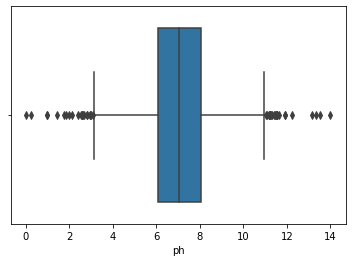

In [12]:
#importamos la función boxplot de la libreria seaborn
from seaborn import boxplot
boxplot(df.ph, orient="v")

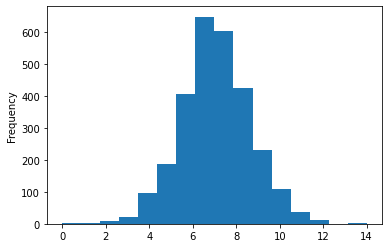

In [ ]:
#algunas gráficas sobre el dataset
#histograma de la variable ph, con 16 bines 
df['ph'].plot.hist(bins=16)

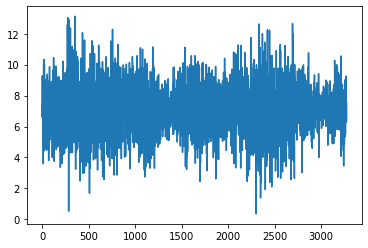

In [ ]:
#visializamos la variable Choramines, a través de un plotline
df['Chloramines'].plot.line()

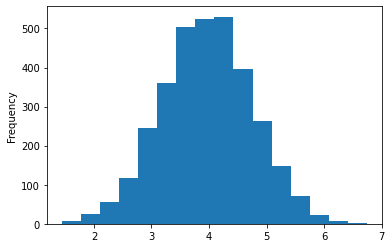

In [ ]:
#visualizamos la variable Turbidity mediante un histograma de 16 bines 
df['Turbidity'].plot.hist(bins=16)

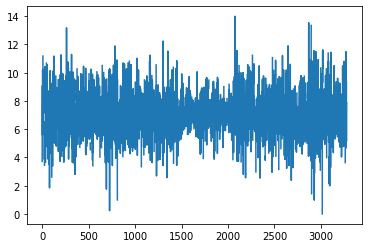

In [ ]:
#visualizamos la variable ph mediante un plotline
df['ph'].plot.line()

Text(0.5, 1.0, 'pH Hist')

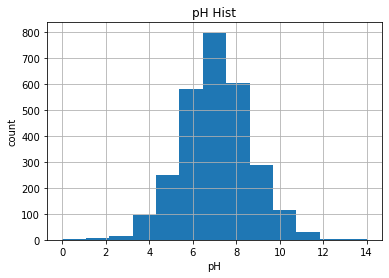

In [ ]:
#grafica de la variable ph un poca más elaborada
df.ph.hist(bins=13)
plt.xlabel('pH')
plt.ylabel('count')
plt.title('pH Hist')

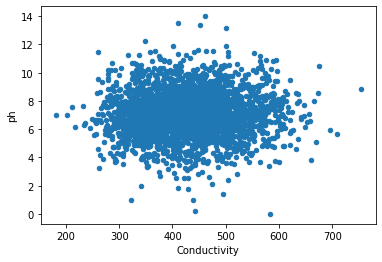

In [ ]:
#scatterplot de ph vs Conductivity 
df.plot(y='ph', x='Conductivity', kind = 'scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


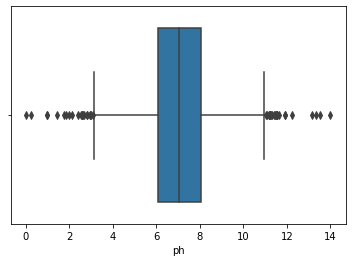

In [ ]:
#importamos la función boxplot de la librería seaborn
from seaborn import boxplot
boxplot(df.ph, orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


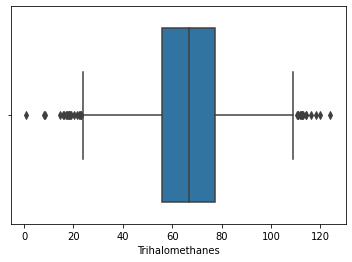

In [ ]:
#imprimimos otro boxplot
boxplot(df.Trihalomethanes, orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


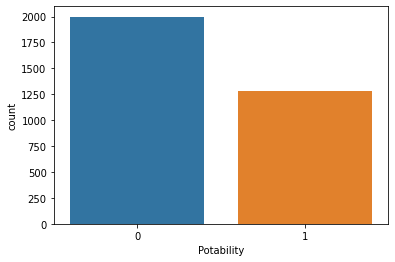

In [ ]:
#countplot de la variable Potability
sns.countplot(df['Potability'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


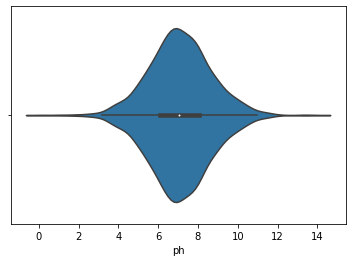

In [ ]:
#importamos la variable violinplot de la librería seaborn y hacemos un violinplot de la variable ph
from seaborn import violinplot
violinplot(df.ph, data=df , orient="v")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


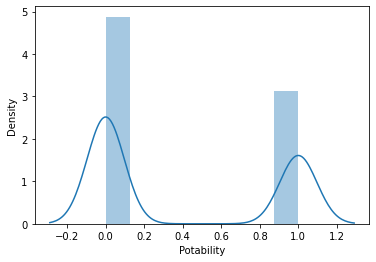

In [ ]:
#importamos la función displot de la librería seaborn y realizamos un displot de la variable Potability
from seaborn import distplot
distplot(df.Potability)

In [ ]:
#hacemos un descripción de la variable Turbidity
df.Turbidity.describe()

count    3276.000000
mean        3.966786
std         0.780382
min         1.450000
25%         3.439711
50%         3.955028
75%         4.500320
max         6.739000
Name: Turbidity, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


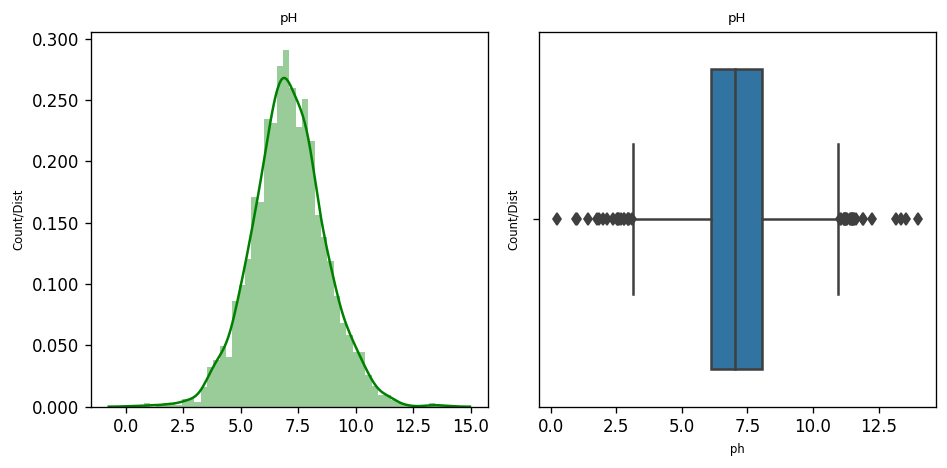

In [ ]:
#realizaremos un breve analisis de las variables ph y Chloramines mediante gráficas de distrubución y caja
from matplotlib.ticker import FormatStrFormatter
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['ph']!=0]['ph'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('pH',fontdict={'fontsize':8})
axes[0].set_xlabel('',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['ph']!=0]['ph'],ax=axes[1],orient='v')
axes[1].set_title('pH',fontdict={'fontsize':8})
axes[1].set_xlabel('ph',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Count/Dist',fontdict={'fontsize':7})
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


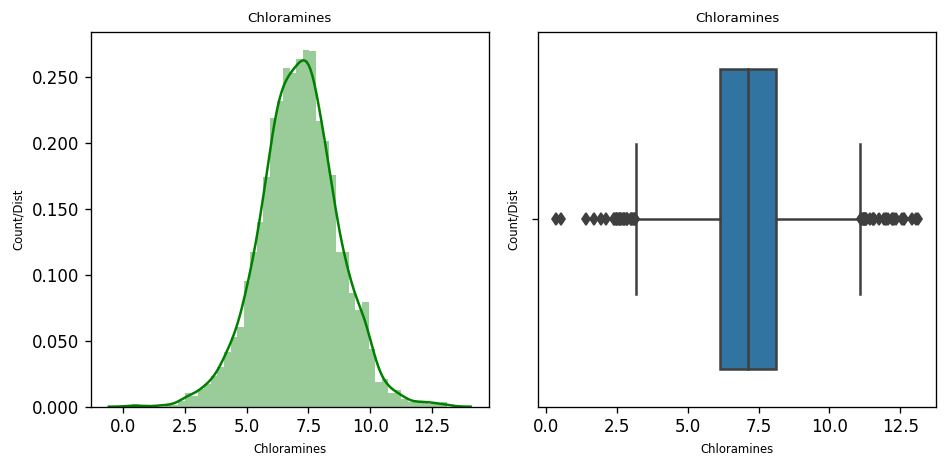

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Chloramines']!=0]['Chloramines'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Chloramines',fontdict={'fontsize':8})
axes[0].set_xlabel('Chloramines',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Chloramines']!=0]['Chloramines'],ax=axes[1],orient='v')
axes[1].set_title('Chloramines',fontdict={'fontsize':8})
axes[1].set_xlabel('Chloramines',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Count/Dist',fontdict={'fontsize':7})
plt.tight_layout()

Distribución de Frecuencias 

In [ ]:
#convertimos la variable Chloramines tipo float a tipo int
df['Chloramines']=df['Chloramines'].astype('int')

In [ ]:
#verificamos la distribución de frecuencia de los valores para la variable Chloramides 
frec = df["Chloramines"].value_counts()
frec

7     846
6     802
8     535
5     444
9     266
4     191
10     71
3      63
11     21
2      21
12      9
1       3
13      2
0       2
Name: Chloramines, dtype: int64

In [ ]:
#convertimos la tabla de distribución de frecuancia a un dataframe
frec_df = pd.DataFrame(frec)
frec_df

,Chloramines
7,846
6,802
8,535
5,444
9,266
4,191
10,71
3,63
11,21
2,21


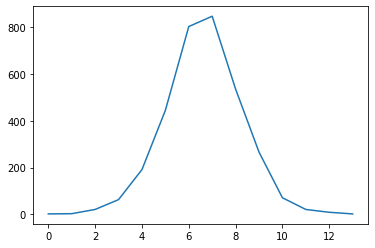

In [ ]:
#hacemos una breve visualización de la distribución de la variable Chloramides 
df['Chloramines'].value_counts().sort_index().plot.line()

In [ ]:
#remplazamos el nombre de la columna por frec_df, que representa la frecuencia de cada valor que toma la variable Chloramides
frec_df.rename(columns={'Chloramines':'Frec_abs'},inplace=True)
frec_df

,Frec_abs
7,846
6,802
8,535
5,444
9,266
4,191
10,71
3,63
11,21
2,21


In [ ]:
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum
7,846,846
6,802,1648
8,535,2183
5,444,2627
9,266,2893
4,191,3084
10,71,3155
3,63,3218
11,21,3239
2,21,3260


In [ ]:
#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(df.Chloramines),4)
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%
7,846,846,25.8242
6,802,1648,24.4811
8,535,2183,16.3309
5,444,2627,13.5531
9,266,2893,8.1197
4,191,3084,5.8303
10,71,3155,2.1673
3,63,3218,1.9231
11,21,3239,0.6410
2,21,3260,0.6410


In [ ]:
#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para irlas sumando
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

,Frec_abs,frec_abs_acum,frec_rel_%,frec_rel_%_acum
7,846,846,25.8242,25.8242
6,802,1648,24.4811,50.3053
8,535,2183,16.3309,66.6362
5,444,2627,13.5531,80.1893
9,266,2893,8.1197,88.3090
4,191,3084,5.8303,94.1393
10,71,3155,2.1673,96.3066
3,63,3218,1.9231,98.2297
11,21,3239,0.6410,98.8707
2,21,3260,0.6410,99.5117


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


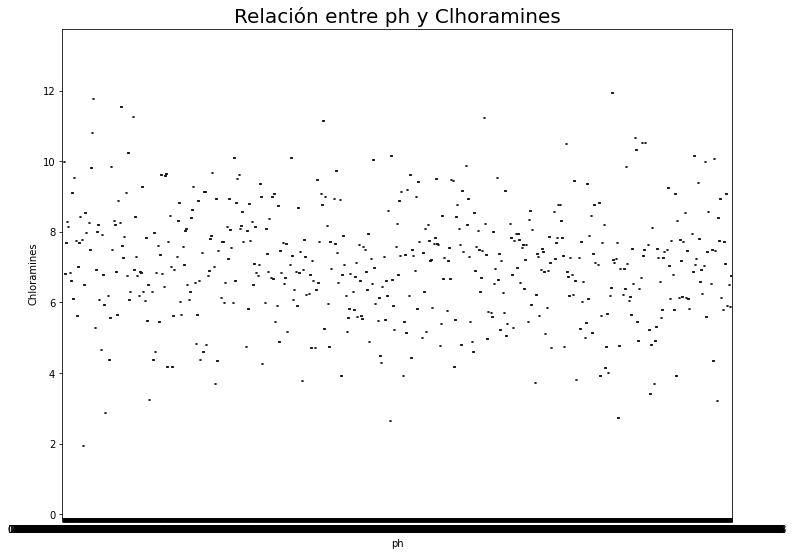

In [6]:
# ph vs Chloramines
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(df['ph'], df['Chloramines'], palette = 'viridis')
plt.title('Relación entre ph y Clhoramines', fontsize = 20)
plt.show()

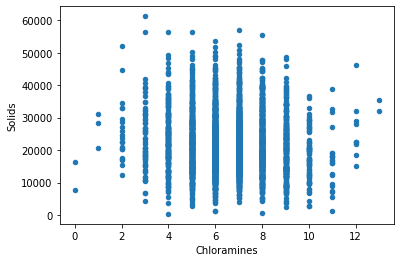

In [ ]:
#scatterplot Solids vs Chloramines 
df.plot(y='Solids', x='Chloramines', kind='scatter')

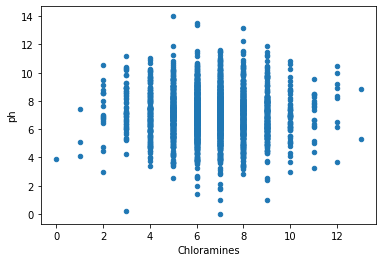

In [ ]:
#Scatterplot Chloramines vs ph
df.plot.scatter(x='Chloramines', y='ph')

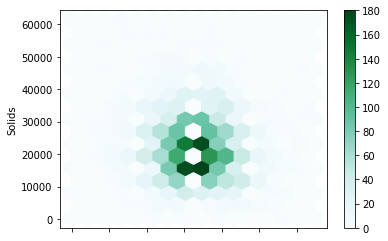

In [ ]:
#Chloramines vs Solids 
df.plot.hexbin(x='Chloramines', y='Solids', gridsize=15)

In [ ]:
#Filtramos la data y realizamos una agrupacion
wq_legendary = df.groupby(['Potability', 'ph']).mean()[['Solids', 'Turbidity']]
wq_legendary

Solids  Turbidity
Potability ph                                
0          0.000000   49456.587108   4.928840
           0.975578   31145.110739   2.533996
           1.431782   12937.246891   4.948443
           1.844538   28689.595778   5.013463
           1.985383   23039.328505   3.923093
...                            ...        ...
1          11.244507  43533.657845   2.929953
           11.301794  39227.619457   3.309580
           11.491011  37188.826022   4.369264
           11.898078   8296.550611   3.024968
           13.175402  19237.949676   4.106924

[2785 rows x 2 columns]

In [18]:
#Generamos otro dataset
wq_stats_by_generation = df.groupby('ph').mean()[['Potability', 'Chloramines','Trihalomethanes']]
wq_stats_by_generation

,Potability,Chloramines,Trihalomethanes
ph,,,
0.000000,0.0,7.897539,77.712891
0.227499,1.0,3.462492,62.322711
0.975578,0.0,7.615583,NaN
0.989912,1.0,9.293289,43.578466
1.431782,0.0,6.214773,61.141119
...,...,...,...
12.246928,0.0,8.465160,73.832405
13.175402,1.0,8.907020,NaN
13.349889,0.0,6.717973,85.883523


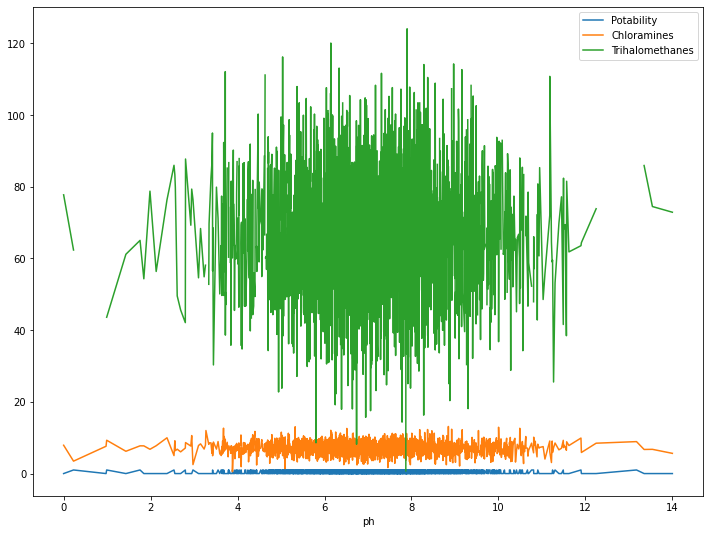

In [14]:
wq_stats_by_generation.plot.line()

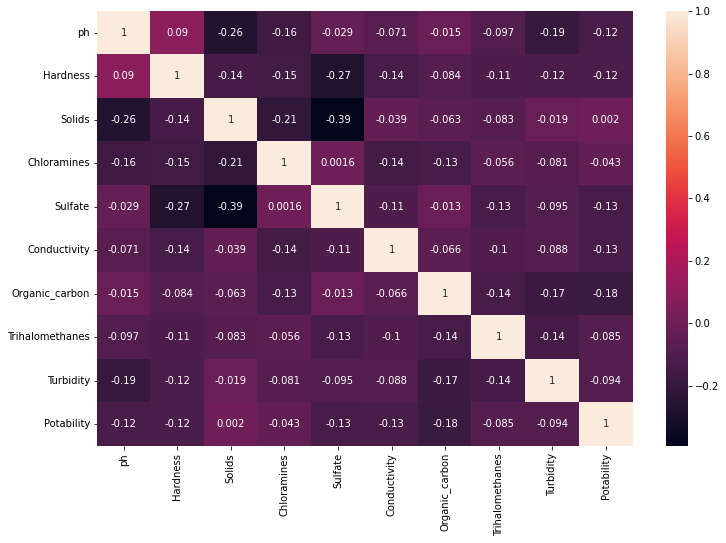

In [ ]:
#Correlaciones
plt.figure(figsize=(12, 8))

df = df.corr()
sns.heatmap(df, 
            xticklabels = df.columns.values,
            yticklabels = df.columns.values,
            annot = True);